### 0. Food for thought

If you think about, Time Series are all around you. For example, stock market, food prices, how much water you use at home daily or how frequent you opening your Facebook app. Time series, basically put all the information in relation of time.

What you have seen in a lecture, that is the gist of it. We could go deeper in mathematic and probability, but the main key to identify how a certian phenonmena behave in time:
* Is the electricity price increasing (upward trend)
* Are we using more water at the weekend (weekly seasonality)
* Sudden increase in online purchase during 2020 (irregularity)
* House purchase over the years. (Cyclicity)

When you recieve a time series, you want to answer some question, by just looking at the data:
* Can I see some trending or seasonal behavior with my data
* Can make an educated guess about the next probable value
* Does it look like a random noise ? it is? then lets do some crunching, is it really a noise.

### 1. Importing libraries

As you may already know, we need some libaries to use some predifined function, so we do not need to reinvent the wheel. So lets use other people work. (That is called open-source)

We are going to use in the first part of the exercise the __datetime__ base library and __pandas__ data wrangling library. It is a good practise to use __as__ for shortening the names.

In [2]:
import datetime as dt
import pandas as pd

### 2. Loading the Dataset
* Load data with the __pd.read_csv__ function by specifying the location of the dataset, which is in your __data__ folder.
* After loading the data, it is good to see how the data was loaded. Sometime, we can spot some errors in the original dataset.

In [11]:
milk_prod = pd.read_csv("data/monthlyMilkProduction.csv")
milk_prod.head(1)

,Month,Monthly_milk_production:_L_per_cow
0,1962-01,589.0


### 3. Analyzing the data

After you are confirmed that the data was loaded correctly, you always want to start with getting to know the dataset. Without knowing what our dataset contains, we don't know what it is that we are working with. This step sets up the possibilty for you to identify missing or incorrect data. It is an important prerequisite for data cleaning!

In [12]:
milk_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Month                               168 non-null    object 
 1   Monthly_milk_production:_L_per_cow  165 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


### 4. Cleaning the Data
After identifying the general characteristics of our dataset, we can clean it up. Below, you can see a couple of queries that you can perform to make your data cleaner. Clean data is the fundation of a good data analysis! Cleaning the dataset can include, but is not limited to:

* Dealing with missing values
    * Instead of removing the missing values, let's interpolate (create a new values, based their neighbouring values.)  
* Formating date columns
    * Let's create a separate date column, plus a separate year and month
* Adding calculated columns
    * And let's create and extra column based on how many data we have in a year.

After we are satisfied with the cleanliness of our dataset, we should always save it under a new name. This allows you to look back at the original dataset easily and have a clear separation between the cleaned and raw dataset. You do not have to run the cleaning code again, and can simply work with the already cleaned dataset next time you open up the code.

In [14]:
#we don't like # and capital letter in the column name, so we will rename it
milk_prod.rename(columns={"Monthly_milk_production:_L_per_cow": "milk_production"}, inplace=True)

#count missing values by columns
print("Check for missing values:")
print(milk_prod.isnull().sum())
#We can see we have 3 in the milk_production column
# Let's interpolate the missing values, based on their previous and next values
milk_prod["milk_production"].interpolate(inplace=True)

#Did we succeed?
print("Check for missing values:")
print(milk_prod.isnull().sum())

#Create the date, year, month  and drop the Month column
milk_prod["date"] = pd.to_datetime(milk_prod["Month"], format="%Y-%m")
milk_prod["year"] = milk_prod["date"].dt.year
milk_prod["month"] = milk_prod["date"].dt.month

milk_prod.drop("Month", axis=1, inplace=True)

#Set the column order
milk_prod = milk_prod[["date","year", "month","milk_production"]]

#Check the data types
milk_prod.dtypes

Check for missing values:
Month              0
milk_production    3
dtype: int64
Check for missing values:
Month              0
milk_production    0
dtype: int64


date               datetime64[ns]
year                        int64
month                       int64
milk_production           float64
dtype: object

In [15]:
#Lets set the year and month as the index
milk_prod.set_index(["year","month"], inplace=True)
milk_prod

date  milk_production
year month                            
1962 1     1962-01-01            589.0
     2     1962-02-01            561.0
     3     1962-03-01            640.0
     4     1962-04-01            656.0
     5     1962-05-01            727.0
...               ...              ...
1975 8     1975-08-01            858.0
     9     1975-09-01            817.0
     10    1975-10-01            827.0
     11    1975-11-01            797.0
     12    1975-12-01            843.0

[168 rows x 2 columns]


### 5. Exploratory Data Analysis (EDA)

* Data Exploration is one of the most crucial part of Time Series analysis. Here we can understand, our dataset, making pleliminary assumptions (hypothesis).
* First we can make some descriptive statistic on the dataset, so we know what range our data moving.

In [17]:
#Check the descriptive statistics of the data
print(milk_prod.describe())

#Which year has the highest milk_production?
milk_prod_year_max = milk_prod.groupby(milk_prod["date"].dt.year)["milk_production"].sum().sort_values(ascending=False)

#Which year has the lowest milk_production?
milk_prod_year_min = milk_prod.groupby(milk_prod["date"].dt.year)["milk_production"].sum().sort_values(ascending=True)


print(
    f"The year with the heighest yield of milk production is: {milk_prod_year_max.index[0]}"
)
print(
    f"The year with the lowest yield of milk production is: {milk_prod_year_min.index[0]}"
)

       milk_production
count       168.000000
mean        755.139881
std         102.601314
min         553.000000
25%         677.750000
50%         761.000000
75%         824.500000
max         969.000000
The year with the heighest yield of milk production is: 1975
The year with the lowest yield of milk production is: 1962


In [18]:
#Get the the month with the highest yield of milk_production each year
milk_prod.groupby(milk_prod["date"].dt.year)["milk_production"].agg(
    milk_prod="max", 
    month="idxmax"
)
#Without plotting we can see that the month with the highest yield of milk production is the same every year (May)
#That is indicating some seasonality in the data

,milk_prod,month
date,,
1962,727.0,"(1962, 5)"
1963,742.0,"(1963, 5)"
1964,770.0,"(1964, 5)"
1965,782.0,"(1965, 5)"
1966,811.0,"(1966, 5)"
1967,837.0,"(1967, 5)"
1968,858.0,"(1968, 5)"
1969,871.0,"(1969, 5)"
1970,886.0,"(1970, 5)"


In [20]:
#let see how the yearly mean of the milk_production is changing over time
milk_prod_mean = milk_prod.groupby(milk_prod["date"].dt.year)["milk_production"].mean()
print(milk_prod_mean)

#We can see that the mean milk production is increasing over time
#That is indicating some trend in the data

#lets add date back to the sub dataset
milk_prod_mean = milk_prod_mean.reset_index()
milk_prod_mean["date"] = pd.to_datetime(milk_prod_mean["date"], format="%Y")

date
1962    615.750000
1963    630.000000
1964    658.750000
1965    675.041667
1966    708.750000
1967    732.916667
1968    748.833333
1969    763.916667
1970    782.000000
1971    836.000000
1972    854.166667
1973    842.583333
1974    858.416667
1975    864.833333
Name: milk_production, dtype: float64


In [23]:
#let see how the yearly standard deviation of the milk production is changing over time
milk_prod_std = milk_prod.groupby(milk_prod["date"].dt.year)["milk_production"].std()
print(milk_prod_std)
#We can see that the standard deviation of milk_production is not increasing over time.
#That is indicating that this time series has some additive component

#lets add date back to the sub dataset
milk_prod_std = milk_prod_std.reset_index()
milk_prod_std["date"] = pd.to_datetime(milk_prod_std["date"], format="%Y")
milk_prod_std

date
1962    56.105623
1963    58.535149
1964    56.236716
1965    61.712110
1966    58.070686
1967    59.330290
1968    57.639685
1969    58.352313
1970    57.322057
1971    60.692968
1972    61.004968
1973    64.525482
1974    64.830490
1975    58.717867
Name: milk_production, dtype: float64


,date,milk_production
0,1962-01-01,56.105623
1,1963-01-01,58.535149
2,1964-01-01,56.236716
3,1965-01-01,61.712110
4,1966-01-01,58.070686
5,1967-01-01,59.330290
6,1968-01-01,57.639685
7,1969-01-01,58.352313
8,1970-01-01,57.322057
9,1971-01-01,60.692968


### 6. Visualisation

What we did, by the nummerical/programmatic checking, we can do it sometime just looking at the data. Why sometimes? Because data come every shape and form, and the world random enough to present itself with tricky information, which is not apperent to see for the first glance.

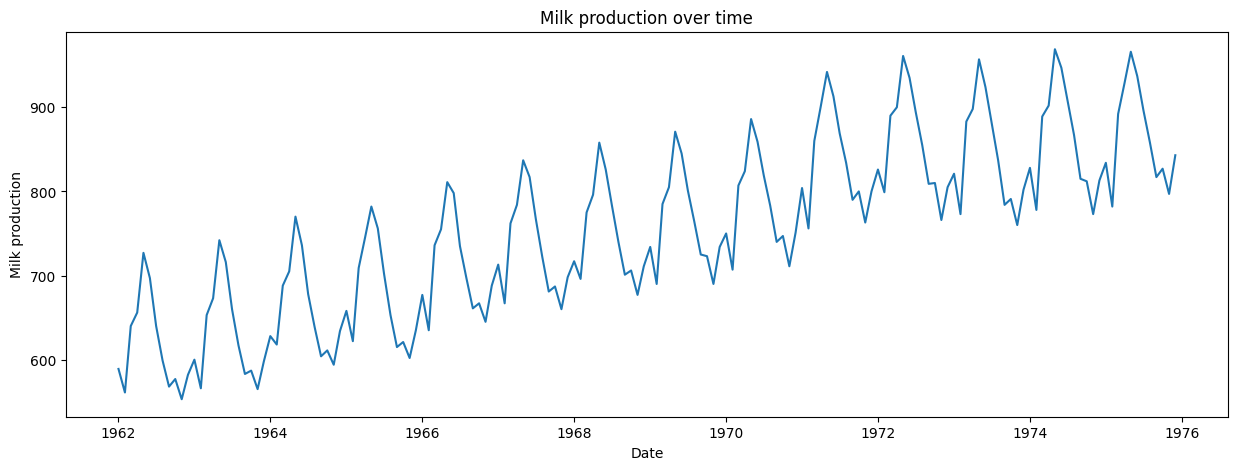

In [24]:
#Let's plot the data 
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(milk_prod["date"], milk_prod["milk_production"])
plt.title("Milk production over time")
plt.xlabel("Date")
plt.ylabel("Milk production")
plt.show()


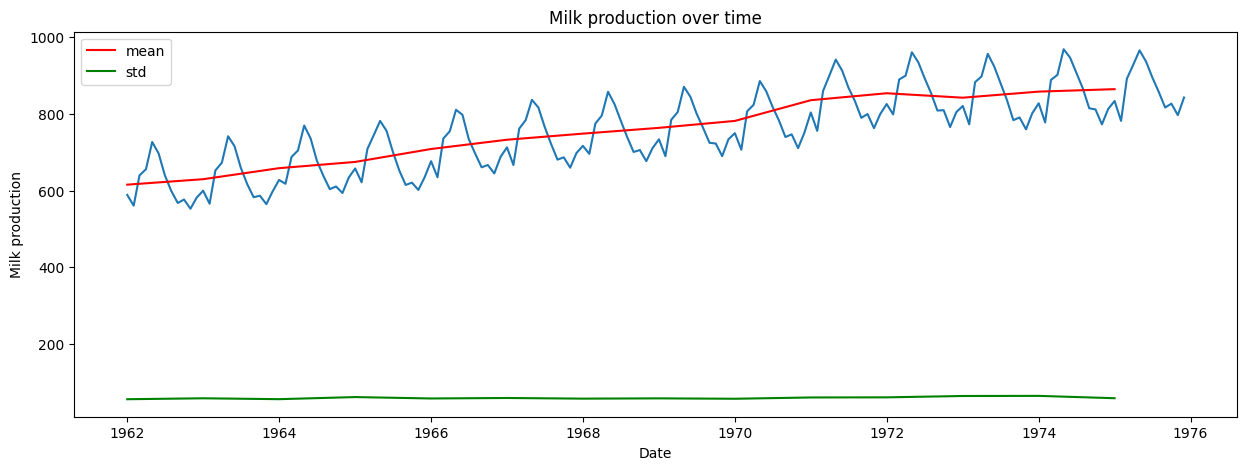

In [25]:
#lets add the calculated mean and variance to the plot
plt.figure(figsize=(15, 5))
plt.plot(milk_prod["date"], milk_prod["milk_production"])
plt.plot(milk_prod_mean["date"], milk_prod_mean["milk_production"], color="red", label="mean")
plt.plot(milk_prod_std["date"], milk_prod_std["milk_production"], color="green", label="std")
plt.title("Milk production over time")
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Milk production")
plt.show()

#We can see that the mean is increasing over time and the variance is increasing as well
#That is indicating that this time series has some multiplicative component and it is non-stationary
#also we can see that there is some seasonality in the data

### 5 ext. Exploratory Data Analysis (EDA) EXTRA

Lets use some addintional libraries which out of the box helps to decompose our dataset, to see some trend, seasonality and irregularites.


In [26]:
#Decompose the time series into trend, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

#Lets drop the year and month index
milk_prod.reset_index(inplace=True)
milk_prod.drop(["year", "month"], axis=1, inplace=True)
milk_prod.set_index("date", inplace=True)

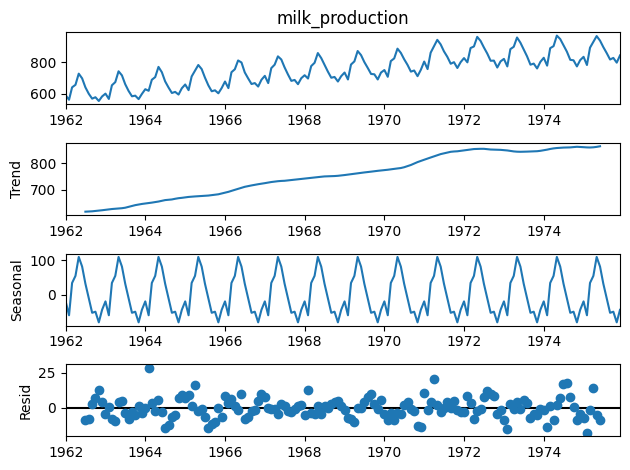

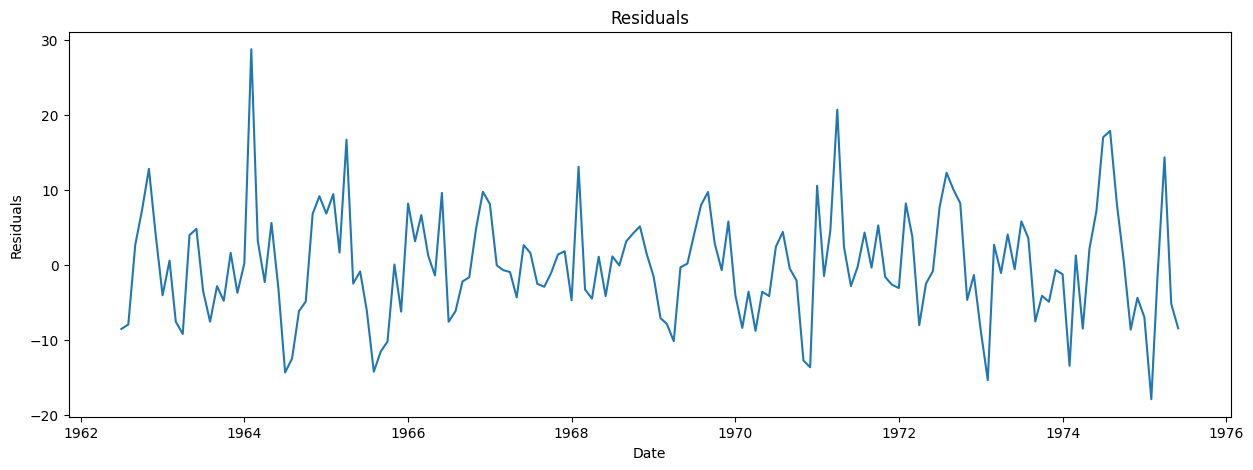

In [29]:
#Lets do some decomposition
milk_decomp = seasonal_decompose(milk_prod["milk_production"] , model="additive")

milk_decomp.plot()
#The residuals are not clearly visible, so lets plot them separately
plt.figure(figsize=(15, 5))
plt.plot(milk_decomp.resid)
plt.title("Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()
#That looks random.


When we are dealing with Time Series, we are doing so to be able to use them to predict the future. We want to see whether the past data can indicate a future behavior and possibly we can take an action, or utilize the predictions.

There are miriad of models and algorithms have been developed over the years in order to predict future. But most of them rely on one specific feature of the time series, that is it stationary or not.

So let's see

In [30]:
#In the previous task we have seen that the time series is non-stationary, by looking at the mean and variance
#and also we have seen that there is some seasonality in the data by looking at the plot
#Lets check if the time series is stationary by using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

#Lets create a function to check if the time series is stationary
def check_stationarity(timeseries):

    #Determing rolling statistics
    #Rolling statistics is used to check if the mean and variance is constant over time
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15, 5))
    plt.plot(timeseries, color="blue", label="Original")
    plt.plot(rolmean, color="red", label="Rolling Mean")
    plt.plot(rolstd, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput[f"Critical Value ({key})"] = value
    print(dfoutput)

Augmented Dickey Fuller test or (ADF Test) is the most commonly used test to detect stationarity. Here, we assume (inn statistics we say the null-hypothesis) the time series is non-stationary. Then, we collect evidence to support or reject our assumptions(null hypothesis). So, if we find that the __p-value__ in ADF test is less than the significance level (__0.05__), we can reject our assumptions and we can declare the timeseries is stationary.

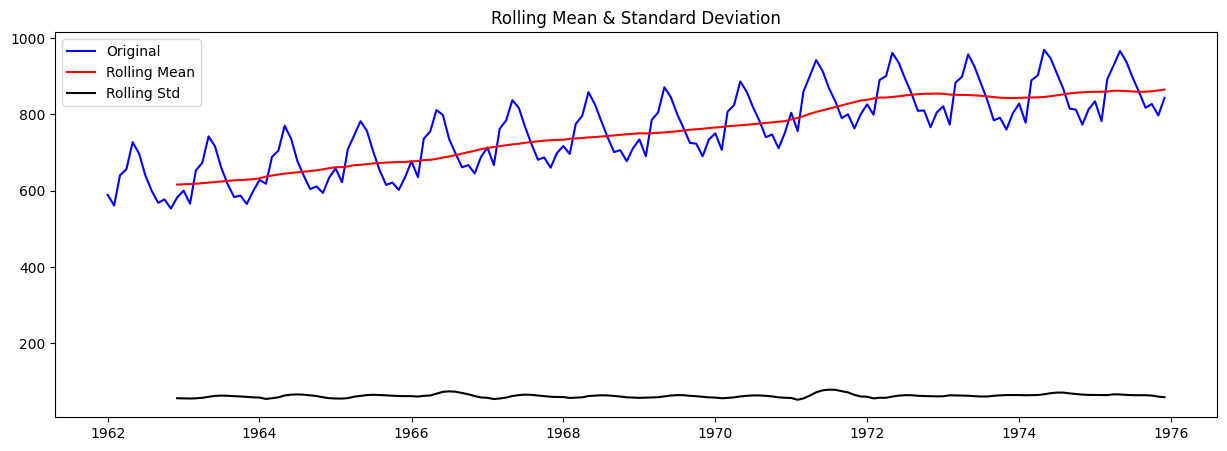

Results of Dickey-Fuller Test:
Test Statistic                  -1.298614
p-value                          0.629806
#Lags Used                      13.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


In [31]:
check_stationarity(milk_prod["milk_production"])
#The p-value is greater than 0.05, so we can not reject our assumption that the time series is non-stationary

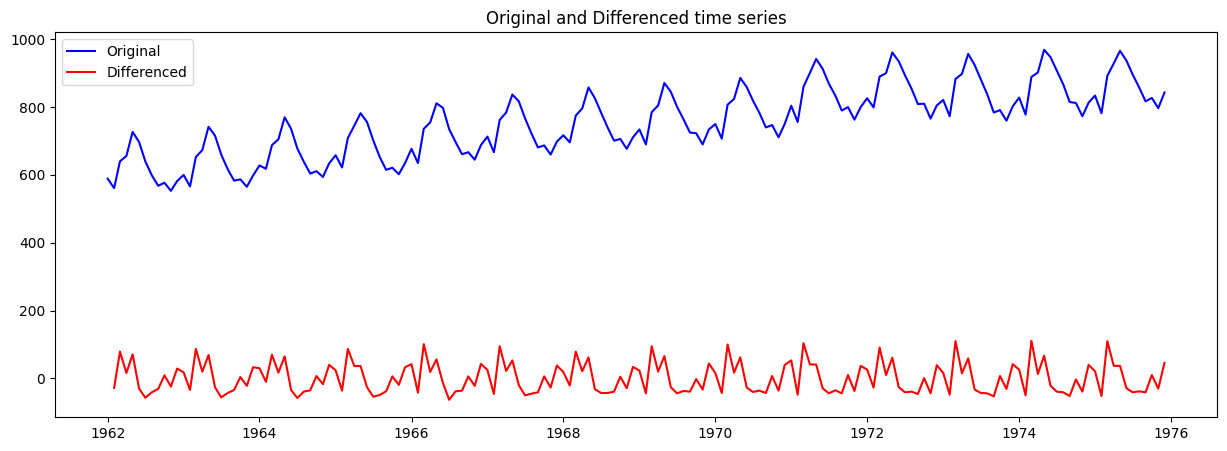

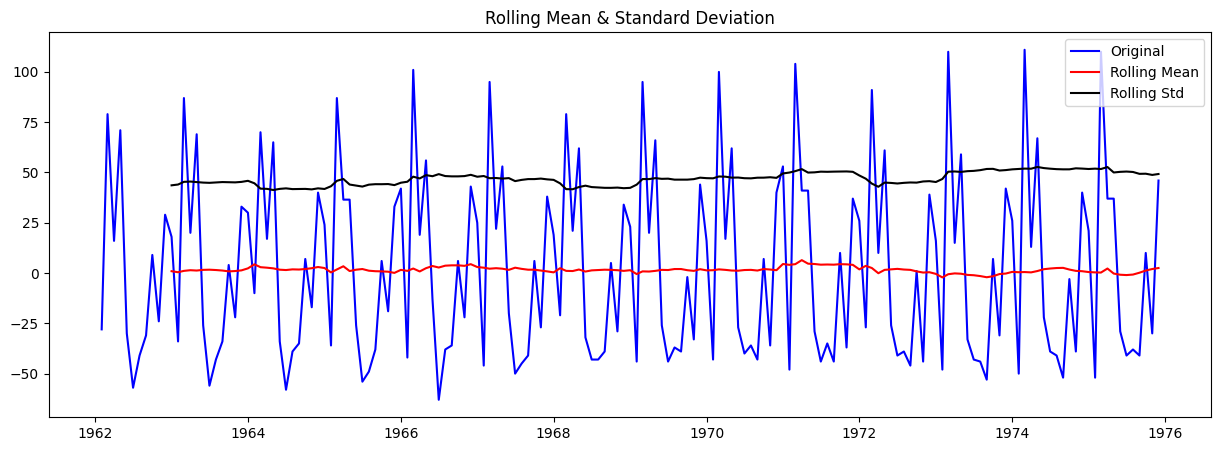

Results of Dickey-Fuller Test:
Test Statistic                  -3.112402
p-value                          0.025649
#Lags Used                      14.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


In [34]:
#Lets do some differencing , shall we?
milk_prod["milk_production_diff"] = milk_prod["milk_production"] - milk_prod["milk_production"].shift(1)

#Let's plot the differenced time series with the original time series
plt.figure(figsize=(15, 5))
plt.plot(milk_prod["milk_production"], color="blue", label="Original")
plt.plot(milk_prod["milk_production_diff"], color="red", label="Differenced")
plt.legend(loc="best")
plt.title("Original and Differenced time series")
plt.show()

#Hmm, that's seems to remove the trend, but the variance is still increasing over time
#Lets check if the time series is stationary by using the Augmented Dickey-Fuller test

check_stationarity(milk_prod["milk_production_diff"][1:])

#With one differencing we can reject our assumption that the time series is non-stationary


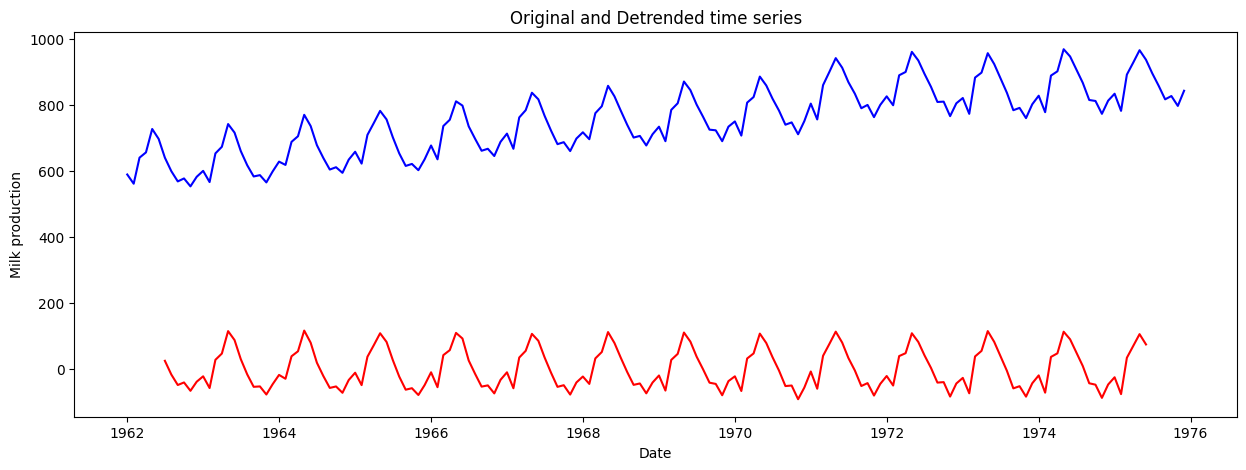

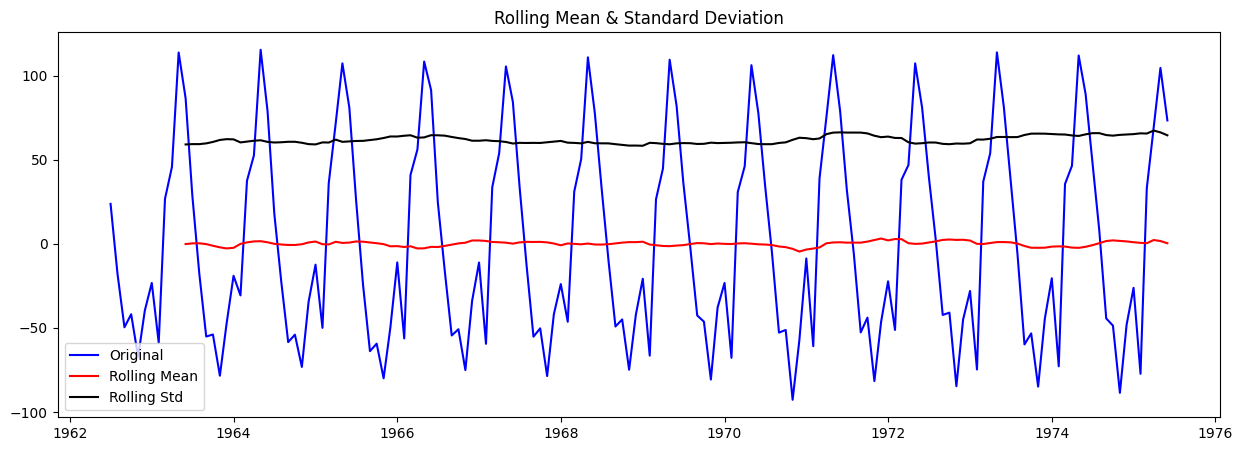

Results of Dickey-Fuller Test:
Test Statistic                  -4.411102
p-value                          0.000284
#Lags Used                      12.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [40]:
#We can do the same by using the output from the seasonal_decompose function
detrended = milk_prod['milk_production'].values - milk_decomp.trend

#Lets plot the detrended time series with the original time series
plt.figure(figsize=(15, 5))
plt.plot(milk_prod["milk_production"], color="blue", label="Original")
plt.plot(detrended, color="red", label="Detrended")
plt.title("Original and Detrended time series")
plt.xlabel("Date")
plt.ylabel("Milk production")
plt.show()

#Lets check if the time series is stationary by using the Augmented Dickey-Fuller test
check_stationarity(detrended[6:-6])

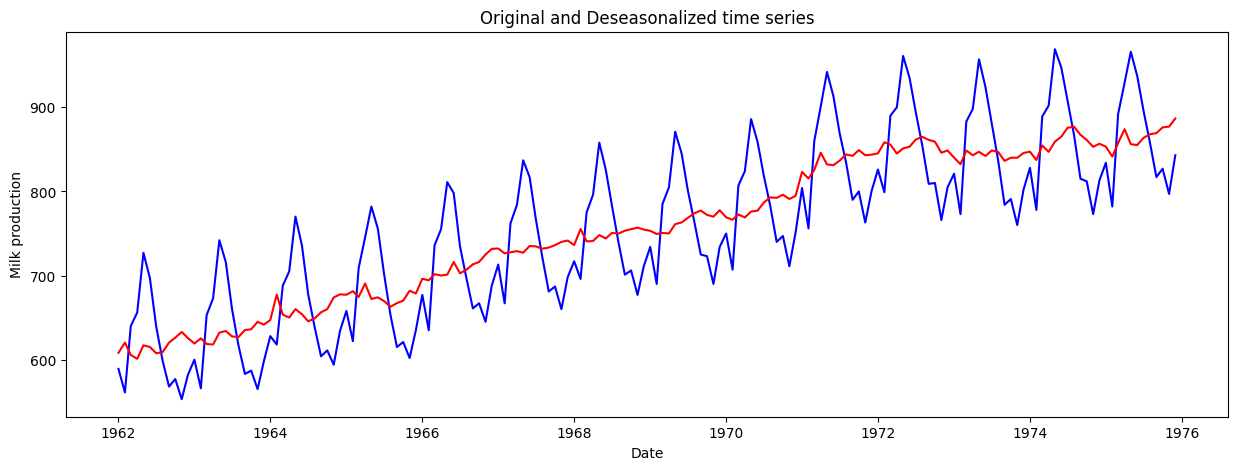

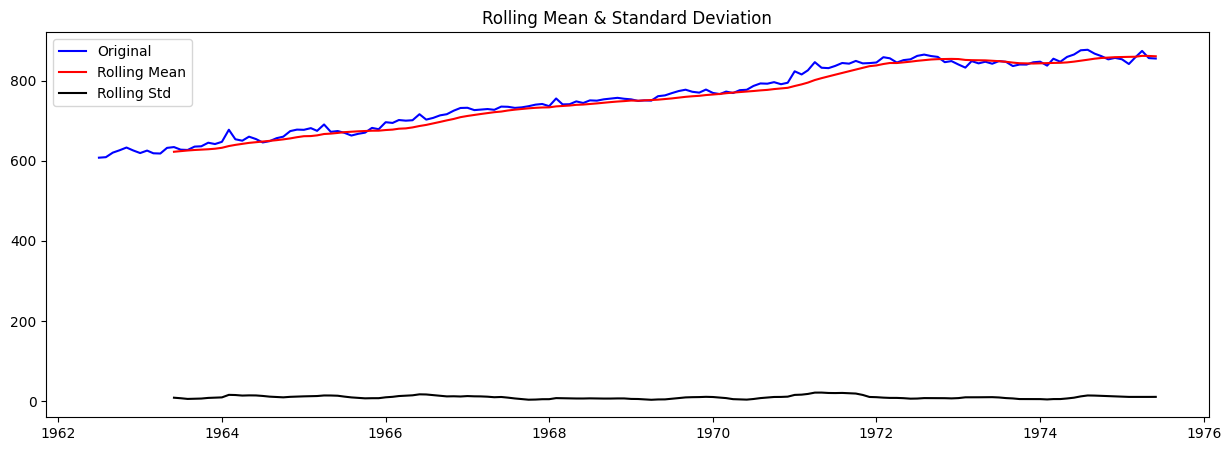

Results of Dickey-Fuller Test:
Test Statistic                  -1.588977
p-value                          0.489129
#Lags Used                       6.000000
Number of Observations Used    149.000000
Critical Value (1%)             -3.475018
Critical Value (5%)             -2.881141
Critical Value (10%)            -2.577221
dtype: float64


In [42]:
#lets remove the seasonality
deseasonal = milk_prod['milk_production'].values - milk_decomp.seasonal

#Lets plot the deseasonalized time series with the original time series
plt.figure(figsize=(15, 5))
plt.plot(milk_prod["milk_production"], color="blue", label="Original")
plt.plot(deseasonal, color="red", label="Deseasonalized")
plt.title("Original and Deseasonalized time series")
plt.xlabel("Date")
plt.ylabel("Milk production")
plt.show()

#Lets check if the time series is stationary by using the Augmented Dickey-Fuller test
check_stationarity(deseasonal[6:-6])

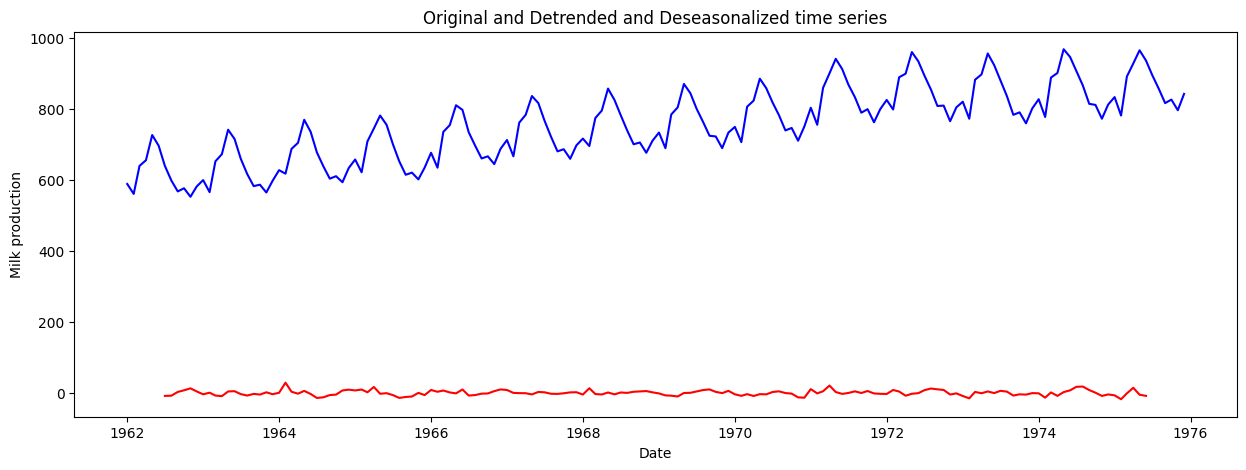

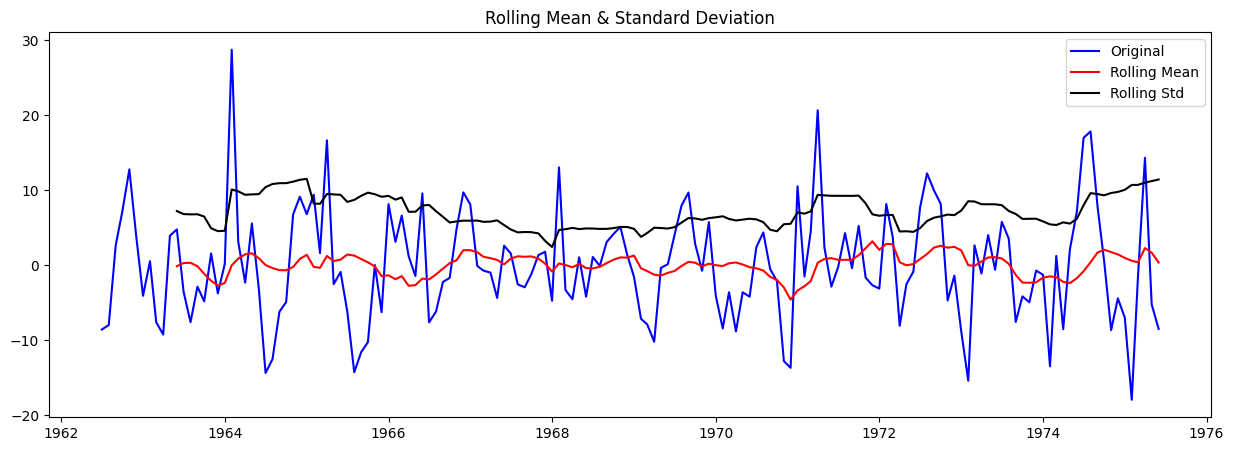

Results of Dickey-Fuller Test:
Test Statistic                -6.273007e+00
p-value                        3.962040e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.460000e+02
Critical Value (1%)           -3.475953e+00
Critical Value (5%)           -2.881548e+00
Critical Value (10%)          -2.577439e+00
dtype: float64


In [44]:
#Lets remove the trend and seasonality
detrended_deseasonal = milk_prod['milk_production'].values - milk_decomp.seasonal - milk_decomp.trend

#Lets plot the detrended and deseasonalized time series with the original time series
plt.figure(figsize=(15, 5))
plt.plot(milk_prod["milk_production"], color="blue", label="Original")
plt.plot(detrended_deseasonal, color="red", label="Detrended and Deseasonalized")
plt.title("Original and Detrended and Deseasonalized time series")
plt.xlabel("Date")
plt.ylabel("Milk production")
plt.show()

#Lets check if the time series is stationary by using the Augmented Dickey-Fuller test
check_stationarity(detrended_deseasonal[6:-6])
#Thats it for this task, in the next task we will look at how to forecast time series data.

###  7. Interpretation of the results

